<a href="https://colab.research.google.com/github/PabloPoche/api_service_python/blob/master/1_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
import tensorflow as tf
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

--2023-04-01 12:52:09--  http://titanic.csv/
Resolving titanic.csv (titanic.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘titanic.csv’
--2023-04-01 12:52:09--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.008s  

2023-04-01 12:52:10 (7.23 MB/s) - ‘titanic.csv’ saved [61194/61194]

FINISHED --2023-04-01 12:52:10--
Total wall clock time: 0.2s
Downloaded: 1 files, 60K in 0.008s (7.23 MB/s)


### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("titanic.csv")
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df_clean = df.copy()
df_clean.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis='columns', inplace=True)

In [6]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_clean = df_clean.dropna()

In [7]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
print('Quedan', df_clean.shape[0], 'filas para analizar.')

Quedan 714 filas para analizar.


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [8]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [9]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
print("Sobrevivieron", df_clean['Survived'].value_counts()[1],"personas")
print("No Sobrevivieron", df_clean['Survived'].value_counts()[0],"personas")

Sobrevivieron 290 personas
No Sobrevivieron 424 personas


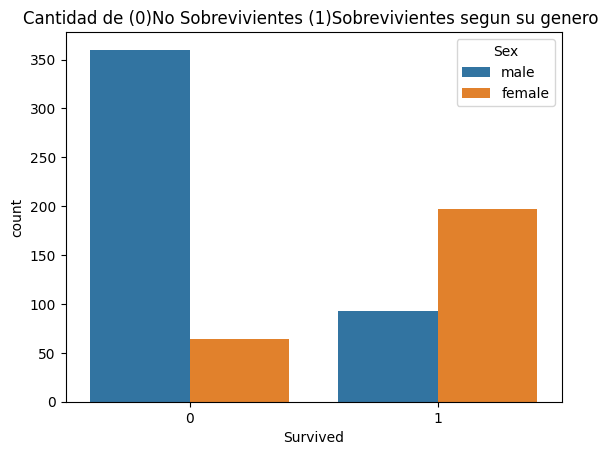

In [10]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x='Survived', data=df_clean, hue="Sex").set_title("Cantidad de (0)No Sobrevivientes (1)Sobrevivientes segun su genero ")
plt.show()

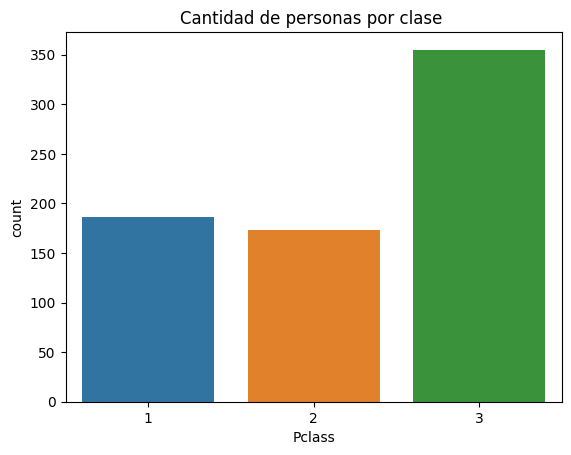

In [11]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(x='Pclass', data=df_clean).set_title("Cantidad de personas por clase ")
plt.show()

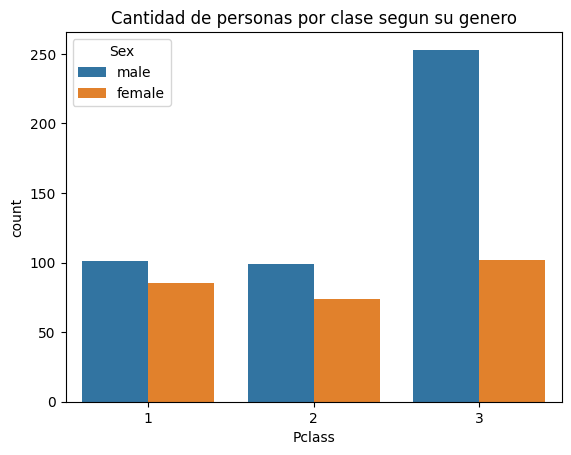

In [12]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x='Pclass', data=df_clean, hue="Sex").set_title("Cantidad de personas por clase segun su genero")
plt.show()

#### Transformar variables categóricas texto a clases numeradas

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df_clean.copy()

In [15]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
le_sex = LabelEncoder()
label_encoding = le_sex.fit_transform(df_cod['Sex'])
df_cod['Sex'] = label_encoding
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [16]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
le_sex.classes_

array(['female', 'male'], dtype=object)

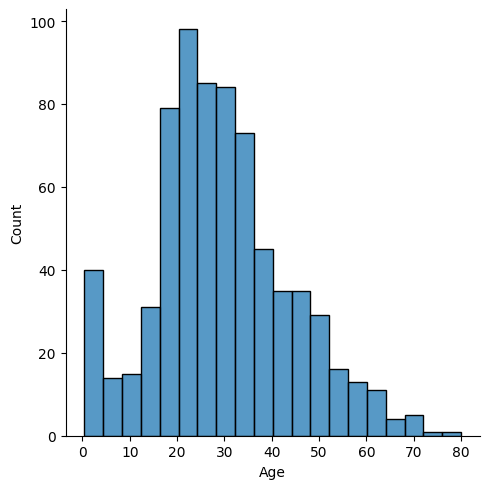

In [17]:
# Alumno: Analizar la distribución de la edad
sns.displot(data=df_cod, x='Age')
plt.show()

In [18]:
# Alumno, cree un dataset df_norm como copia del que viene trabajando
df_norm = df_cod.copy()


In [19]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final
from sklearn.preprocessing import StandardScaler
Age_scaler = StandardScaler()
df_norm.loc[:, 'Age'] = Age_scaler.fit_transform(df_norm[['Age']].values)
df_norm.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,-0.530377,1,0
1,1,1,0,0.571831,1,0
2,1,3,0,-0.254825,0,0
3,1,1,0,0.365167,1,0
4,0,3,1,0.365167,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [39]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_norm.drop('Survived', axis=1).values
y = df_norm['Survived'].values

In [40]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape = X.shape[1] 
in_shape

5

In [41]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape = 1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [95]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta
model = Sequential()
model.add(Dense(units=50, activation='sigmoid', input_shape=(in_shape,)))
model.add(Dense(units=out_shape, activation='sigmoid'))

In [97]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
 

In [98]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=50, batch_size=32)

Epoch 1/50
15/15 [==============================] - 1s 15ms/step - loss: 0.6746 - accuracy: 0.5855 - val_loss: 0.6934 - val_accuracy: 0.5478
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.6359 - accuracy: 0.6338 - val_loss: 0.6510 - val_accuracy: 0.6087
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.6090 - accuracy: 0.6491 - val_loss: 0.6392 - val_accuracy: 0.6261
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5870 - accuracy: 0.6754 - val_loss: 0.6146 - val_accuracy: 0.6609
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5660 - accuracy: 0.7346 - val_loss: 0.5951 - val_accuracy: 0.6957
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5447 - accuracy: 0.7654 - val_loss: 0.5720 - val_accuracy: 0.7217
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5251 - accuracy: 0.7785 - val_loss: 0.5527 - val_accuracy: 0.7391
Epoch 8/50
15/15 [=

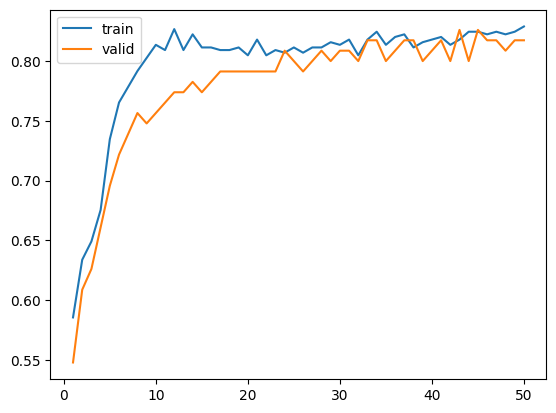

In [99]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line
epocas_conteo= range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epocas_conteo,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epocas_conteo,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [100]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test
y_hat_prob = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [101]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat
y_hat = [1 if x >= 0.5 else 0 for x in y_hat_prob]

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [102]:
# Alumno, calcular la exactitud (accuracy) de su modelo
scores = model.evaluate(X_test, y_test)
scores[1]

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)


5/5 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.7692


0.7692307692307693

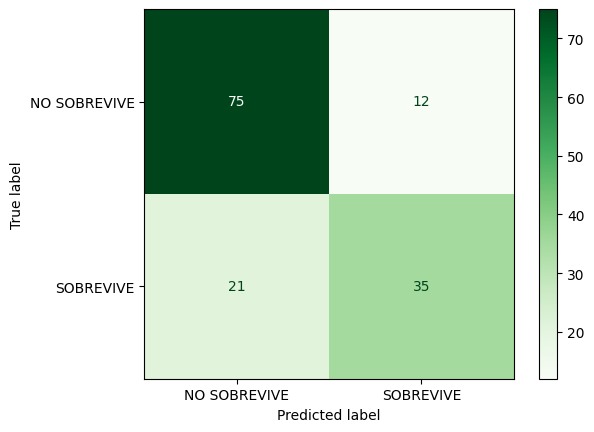

In [104]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=['NO SOBREVIVE', 'SOBREVIVE'])
cmd.plot(cmap=plt.cm.Greens)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [105]:
# Alumno, ponga a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo

Pclass = 2
Sex = 'male'
Age = 49
SibSp = 1
Parch = 1

le_transform_sex = int(le_sex.transform([Sex]))

Age_scaler_transform = float(Age_scaler.transform([[Age]]))

X_prueba = np.array([Pclass, le_transform_sex, Age_scaler_transform, SibSp, Parch])
X_prueba = X_prueba.reshape(1, -1)
y_prueba = float(model.predict(X_prueba))

if y_prueba >= 0.5:
    print('Sobrevivi')
else:
    print('No sobrevivi')



1/1 [==============================] - 0s 17ms/step
No sobrevivi
